# Credit Risk Resampling Techniques

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

# Read the CSV into DataFrame

In [3]:
# Load the data
file_path="C:/Users/CS_Knit_tinK_SC/Documents/GitHub/HW_8_ML_Conf_Imb_Inputs_U11/Resources/lending_data.csv"
#file_path = Path('Resources/lending_data.csv')
df = pd.read_csv(file_path)
df.head()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,own,52800,0.431818,5,1,22800,low_risk
1,8400.0,6.692,own,43600,0.311927,3,0,13600,low_risk
2,9000.0,6.963,rent,46100,0.349241,3,0,16100,low_risk
3,10700.0,7.664,own,52700,0.430740,5,1,22700,low_risk
4,10800.0,7.698,mortgage,53000,0.433962,5,1,23000,low_risk


# Split the Data into Training and Testing

In [4]:
# Create our features
X = df.drop(columns="loan_status")

# Create our target
y = df["loan_status"]

In [5]:
X.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000


In [6]:
y.head()

0    low_risk
1    low_risk
2    low_risk
3    low_risk
4    low_risk
Name: loan_status, dtype: object

In [7]:
# Check the balance of our target values
y.value_counts()

low_risk     75036
high_risk     2500
Name: loan_status, dtype: int64

In [8]:
# Create X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
# from library.module import class

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    # Controls the shuffling applied to the data before applying the split.
                                                    # Pass an int for reproducible output across multiple function calls.
                                                    random_state=1, 
                                                    # If not None, data is split in a stratified fashion, using this as the class labels
                                                    # https://www.scribbr.com/methodology/stratified-sampling/
                                                    stratify=y)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [9]:
# Create the StandardScaler instance to normalize the values individually, before applying the ML model, to get it w/n distr of mean value of 0 and std dev of 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_X_train=pd.get_dummies(X_train, columns=["homeowner"])
new_X_test=pd.get_dummies(X_test, columns=["homeowner"])
scaler.fit(new_X_train)
print(f'the scaler mean is {scaler.mean_}')

the scaler mean is [9.80612533e+03 7.29255941e+00 4.92239476e+04 3.77350994e-01
 3.82654079e+00 3.92351080e-01 1.92239476e+04 4.96354382e-01
 4.01241574e-01 1.02404045e-01]


In [10]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
data_scaler = StandardScaler()

data_scaler.fit(new_X_train)

StandardScaler()

In [11]:
# Scale the training and testing data
X_train_scaled = data_scaler.transform(new_X_train)
X_test_scaled = data_scaler.transform(new_X_test)

# Simple Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [13]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test_scaled)
print(f'The logistic-regression model balanced accuracy score is: {balanced_accuracy_score(y_test, y_pred)}')

The logistic-regression model balanced accuracy score is: 0.9892813049736127


In [14]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  615    10]
 [  102 18657]]


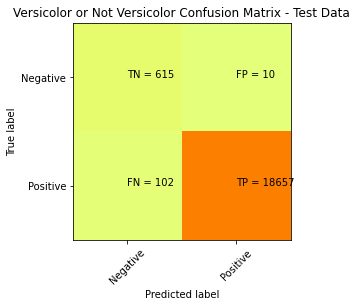

In [15]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('The logistic-regression model Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [16]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.86      0.98      0.99      0.92      0.99      0.98       625
   low_risk       1.00      0.99      0.98      1.00      0.99      0.98     18759

avg / total       0.99      0.99      0.98      0.99      0.99      0.98     19384



# Oversampling

In this section, you will compare two oversampling algorithms to determine which algorithm results in the best performance. You will oversample the data using the naive random oversampling algorithm and the SMOTE algorithm. For each algorithm, be sure to complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

### Naive Random Oversampling

In [17]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

# View the count of target classes with Counter
print(Counter(y_resampled))

Counter({'low_risk': 56277, 'high_risk': 56277})


In [18]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
print(model.fit(X_resampled, y_resampled))

LogisticRegression(random_state=1)


In [19]:
# Calculate the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test_scaled)
print(f'The naive-random-oversampling balanced accuracy score is: {balanced_accuracy_score(y_test, y_pred):.4}')

The naive-random-oversampling balanced accuracy score is: 0.9946


In [20]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  622     3]
 [  111 18648]]


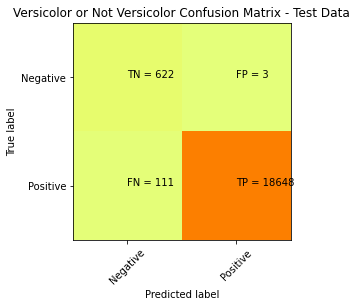

In [21]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('naive-random-oversampling Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [22]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.85      1.00      0.99      0.92      0.99      0.99       625
   low_risk       1.00      0.99      1.00      1.00      0.99      0.99     18759

avg / total       0.99      0.99      1.00      0.99      0.99      0.99     19384



### SMOTE Oversampling

In [23]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(X_train_scaled, y_train)
# View the count of target classes with Counter
print(Counter(y_resampled))

Counter({'low_risk': 56277, 'high_risk': 56277})


In [24]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
print(model.fit(X_resampled, y_resampled))

LogisticRegression(random_state=1)


In [25]:
# Calculate the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test_scaled)
print(f'The smote-oversampling balanced accuracy score is: {balanced_accuracy_score(y_test, y_pred):.4}')

The smote-oversampling balanced accuracy score is: 0.9947


In [38]:
# Display the confusion matrix
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  622     3]
 [  110 18649]]


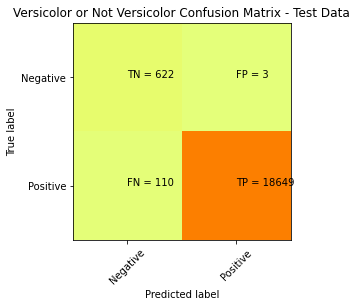

In [39]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('The smote-oversampling  Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [27]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.85      1.00      0.99      0.92      0.99      0.99       625
   low_risk       1.00      0.99      1.00      1.00      0.99      0.99     18759

avg / total       0.99      0.99      1.00      0.99      0.99      0.99     19384



# Undersampling

In this section, you will test an undersampling algorithm to determine which algorithm results in the best performance compared to the oversampling algorithms above. You will undersample the data using the Cluster Centroids algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [28]:
# Resample the data using the ClusterCentroids resampler
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train_scaled, y_train)

# View the count of target classes with Counter
Counter(y_resampled)

Counter({'high_risk': 1875, 'low_risk': 1875})

In [29]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [30]:
# Calculate the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test_scaled)
print(f'The undersampling balanced accuracy score is: {balanced_accuracy_score(y_test, y_pred):.4}')

The undersampling balanced accuracy score is: 0.9933


In [40]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  622     3]
 [  110 18649]]


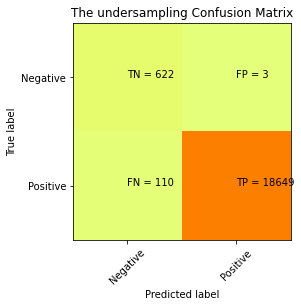

In [46]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('The undersampling Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [32]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.86      0.99      0.99      0.92      0.99      0.99       625
   low_risk       1.00      0.99      0.99      1.00      0.99      0.99     18759

avg / total       1.00      0.99      0.99      0.99      0.99      0.99     19384



# Combination (Over and Under) Sampling

In this section, you will test a combination over- and under-sampling algorithm to determine if the algorithm results in the best performance compared to the other sampling algorithms above. You will resample the data using the SMOTEENN algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [33]:
# Resample the training data with SMOTEENN
from imblearn.combine import SMOTEENN

sm = SMOTEENN(random_state=1)
X_resampled_smote, y_resampled_smote = sm.fit_resample(X_train_scaled, y_train)

# View the count of target classes with Counter
print(Counter(y_resampled_smote))

Counter({'low_risk': 55885, 'high_risk': 55652})


In [34]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled_smote, y_resampled_smote)

LogisticRegression(random_state=1)

In [35]:
# Calculate the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score

y_pred = model.predict(X_test_scaled)
print(f'The combination over/under sampling balanced accuracy score is: {balanced_accuracy_score(y_test, y_pred):.4f}')

the combination over/under sampling balanced accuracy score is: 0.9947


In [42]:
# Display the confusion matrix
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  622     3]
 [  110 18649]]


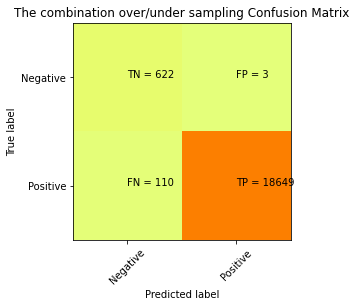

In [44]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('The combination over/under sampling Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [45]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.85      1.00      0.99      0.92      0.99      0.99       625
   low_risk       1.00      0.99      1.00      1.00      0.99      0.99     18759

avg / total       0.99      0.99      1.00      0.99      0.99      0.99     19384



# Final Questions

1. Which model had the best balanced accuracy score?

   All models produced the same balanced accuracy score of .9947, which is very good since it's on a scale of 0 to 1.

2. Which model had the best recall score?

    All models produced the same recall score ('rec' column of imbalanced classification report) of .99.

3. Which model had the best geometric mean score?

    All models produced the same recall score ('geo' column of imbalanced classification report) of .99.
